## Install libraries

In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## Load dataset

In [2]:
esg = read_csv('../notebooks/content/esg.csv', )
esg.columns
# split into input and output variables
#X = dataset[:,0:13]
#Y = dataset[:,13]

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'ESG-2016', 'ESG-2017',
       'ESG-2018', 'ESG-2019', 'ESG-2020', 'Average ESG', 'Risk Level',
       'ESG Rating', 'Symbol.1', 'Name.1', 'Unnamed: 24'],
      dtype='object')

In [3]:
columns = ['symbol', 'company', 'sector', 'price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap','esg_rating']
#columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
esg = esg[['Symbol', 'Name', 'Sector','Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'ESG Rating']]
esg.columns = columns
esg.dropna(inplace=True)
esg.shape

#target = esg.pop('esg_rating')

(461, 11)

In [4]:
esg.head()

,symbol,company,sector,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,esg_rating
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,34.9
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,32.6
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,29.8
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,29.1
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,11.3


In [5]:
# dicitonary for companies name and sector
companies_names = {symbol:company for symbol, company in esg[['symbol', 'company']].values}
companies_sector = {symbol:sector for symbol, sector in esg[['symbol', 'sector']].values}

# get all companies symbols
symbols = esg['symbol'].values
ratings = set(esg['esg_rating'].values)
ratings = sorted(ratings)

# store each individual date and all it's stocks
ratings_dictionary = {rating:{} for rating in ratings}

In [7]:
companies_names

{'MMM': '3M Company',
 'AOS': 'A.O. Smith Corp',
 'ABT': 'Abbott Laboratories',
 'ABBV': 'AbbVie Inc.',
 'ACN': 'Accenture plc',
 'ATVI': 'Activision Blizzard',
 'AYI': 'Acuity Brands Inc',
 'ADBE': 'Adobe Systems Inc',
 'AAP': 'Advance Auto Parts',
 'AMD': 'Advanced Micro Devices Inc',
 'AES': 'AES Corp',
 'AMG': 'Affiliated Managers Group Inc',
 'AFL': 'AFLAC Inc',
 'A': 'Agilent Technologies Inc',
 'APD': 'Air Products & Chemicals Inc',
 'AKAM': 'Akamai Technologies Inc',
 'ALK': 'Alaska Air Group Inc',
 'ALB': 'Albemarle Corp',
 'ARE': 'Alexandria Real Estate Equities Inc',
 'ALXN': 'Alexion Pharmaceuticals',
 'ALGN': 'Align Technology',
 'ALLE': 'Allegion',
 'AGN': 'Allergan, Plc',
 'ADS': 'Alliance Data Systems',
 'LNT': 'Alliant Energy Corp',
 'ALL': 'Allstate Corp',
 'GOOGL': 'Alphabet Inc Class A',
 'MO': 'Altria Group Inc',
 'AMZN': 'Amazon.com Inc',
 'AEE': 'Ameren Corp',
 'AAL': 'American Airlines Group',
 'AEP': 'American Electric Power',
 'AXP': 'American Express Co',
 'A

In [8]:
esg.to_csv('../notebooks/content/emission.csv')

In [265]:
esg['risk_level'] = esg.risk_level.str.lower()

In [293]:
esg = pd.concat([esg, pd.get_dummies(esg['risk_level'], prefix='risk_level')], axis=1)
esg.drop(['risk_level'], axis=1, inplace=True)

KeyError: 'risk_level'

In [4]:
esg.columns

Index(['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share',
       '52_week_low', '52_week_high', 'market_cap'],
      dtype='object')

In [268]:
esg = esg[['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share','52_week_low', '52_week_high', 'market_cap', 'risk_level_high', 'risk_level_low', 'risk_level_medium','risk_level_negligible', 'risk_level_severe', 'esg_rating',]]

In [297]:
esg.head()

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap
0,222.89,24.31,2.33,7.92,259.77,175.49,1.39e+11
1,60.24,27.76,1.15,1.70,68.39,48.92,1.08e+10
2,56.27,22.51,1.91,0.26,64.60,42.28,1.02e+11
3,108.48,19.41,2.50,3.29,125.86,60.05,1.81e+11
4,150.51,25.47,1.71,5.44,162.60,114.82,9.88e+10


In [ ]:
esg

In [5]:
print(esg.dtypes)

price                 float64
price_per_earnings    float64
dividend_yield        float64
earnings_per_share    float64
52_week_low           float64
52_week_high          float64
market_cap            float64
dtype: object


In [271]:
esg['risk_level_high'] = esg['risk_level_high'].astype(float)
esg['risk_level_low'] = esg['risk_level_low'].astype(float)
esg['risk_level_medium'] = esg['risk_level_medium'].astype(float)
esg['risk_level_negligible'] = esg['risk_level_negligible'].astype(float)
esg['risk_level_severe'] = esg['risk_level_severe'].astype(float)
print(esg.dtypes)

price                    float64
price_per_earnings       float64
dividend_yield           float64
earnings_per_share       float64
52_week_low              float64
52_week_high             float64
market_cap               float64
risk_level_high          float64
risk_level_low           float64
risk_level_medium        float64
risk_level_negligible    float64
risk_level_severe        float64
esg_rating               float64
dtype: object


In [299]:

seed = 7
numpy.random.seed(seed)

In [300]:
# descriptions
set_option('precision', 1)
print(esg.describe())

        price  price_per_earnings  dividend_yield  earnings_per_share  \
count   461.0               461.0           461.0               461.0   
mean    101.7                25.4             1.9                 3.8   
std     106.9                42.8             1.4                 5.3   
min       2.8              -251.5             0.0               -24.6   
25%      47.4                15.5             0.8                 1.6   
50%      74.7                19.7             1.8                 2.9   
75%     118.4                25.9             2.8                 5.2   
max    1350.5               520.1             7.7                44.1   

       52_week_low  52_week_high  market_cap  
count        461.0         461.0     4.6e+02  
mean         120.1          81.6     4.9e+10  
std          123.9          77.4     8.8e+10  
min            6.6           2.8     2.6e+09  
25%           58.0          40.0     1.3e+10  
50%           88.1          64.8     2.2e+10  
75%          

In [301]:
# correlation
set_option('precision', 2)
print(esg.corr(method='pearson'))

                    price  price_per_earnings  dividend_yield  \
price                1.00            2.44e-01           -0.27   
price_per_earnings   0.24            1.00e+00           -0.19   
dividend_yield      -0.27           -1.89e-01            1.00   
earnings_per_share   0.53           -3.79e-03           -0.08   
52_week_low          0.99            2.31e-01           -0.28   
52_week_high         0.98            1.93e-01           -0.24   
market_cap           0.41            1.32e-01           -0.01   

                    earnings_per_share  52_week_low  52_week_high  market_cap  
price                         5.32e-01         0.99          0.98        0.41  
price_per_earnings           -3.79e-03         0.23          0.19        0.13  
dividend_yield               -7.92e-02        -0.28         -0.24       -0.01  
earnings_per_share            1.00e+00         0.53          0.56        0.15  
52_week_low                   5.28e-01         1.00          0.98        0.39  

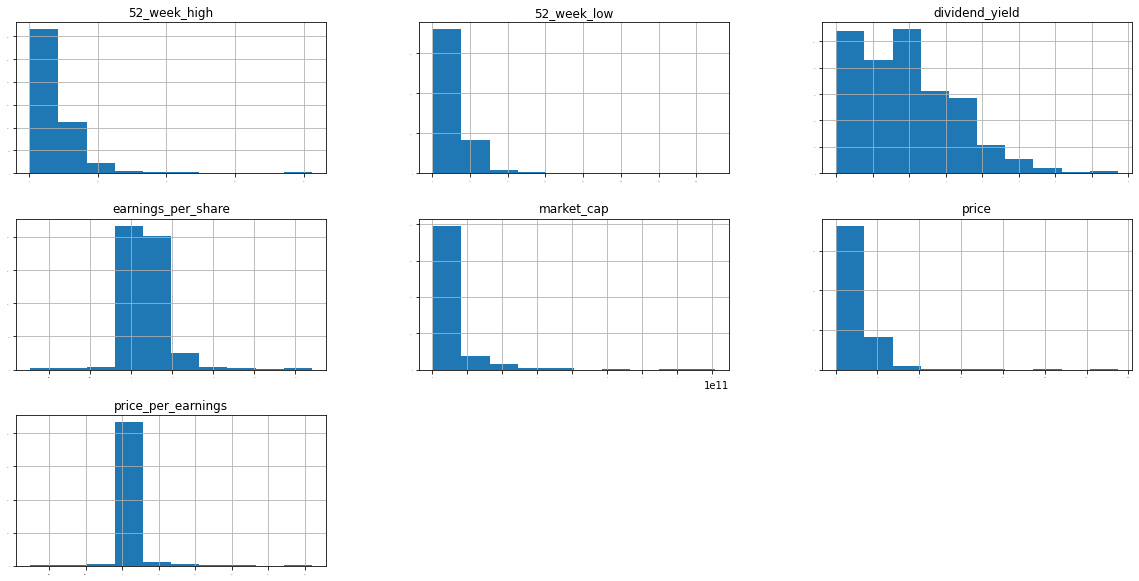

In [327]:
# histograms
plt.rc('figure', figsize=(20,10))
esg.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

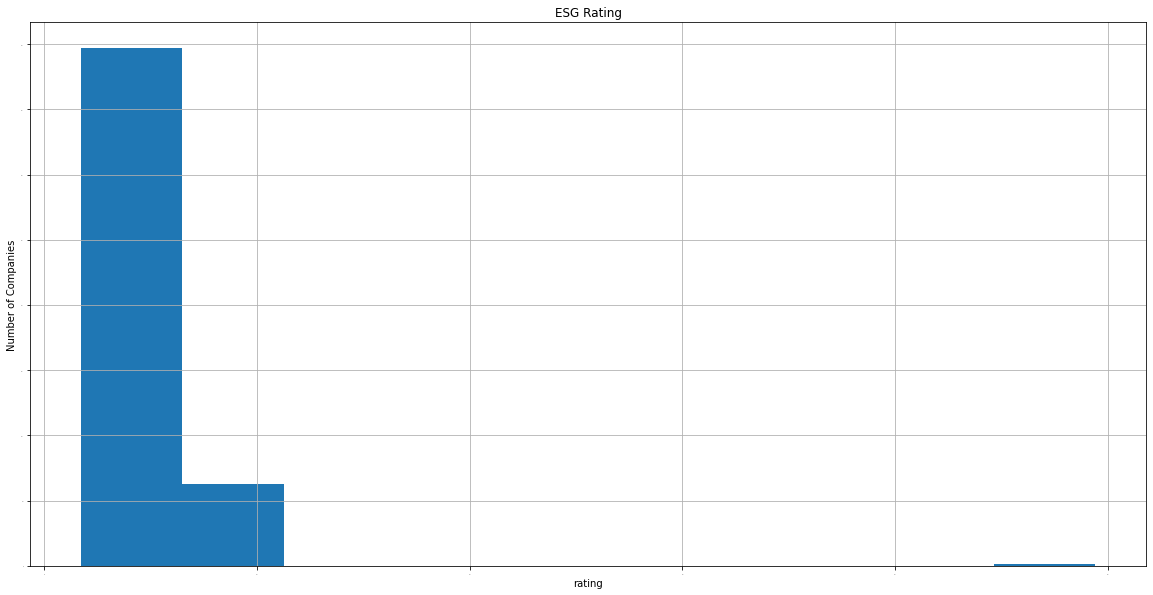

In [328]:
target.hist(xlabelsize=1, ylabelsize=1)
pyplot.title('ESG Rating')
pyplot.xlabel('rating')
pyplot.ylabel('Number of Companies')
pyplot.show()

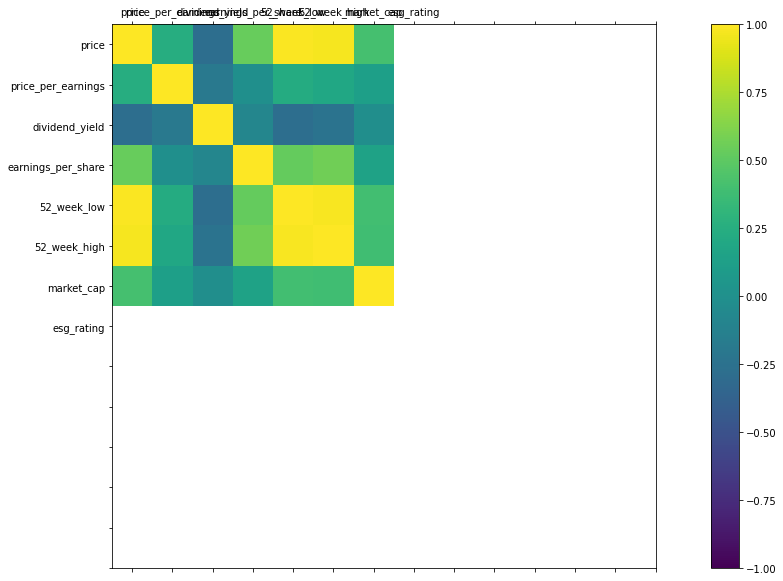

In [329]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(esg.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

In [330]:
# Split-out validation dataset
X = esg.values
Y = target.values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [331]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [332]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [333]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -206.998943 (421.018829)
LASSO: -206.227615 (420.208172)
EN: -206.266083 (420.204815)
KNN: -252.009960 (400.224581)
CART: -374.743637 (560.059986)
SVR: -204.294343 (423.623839)


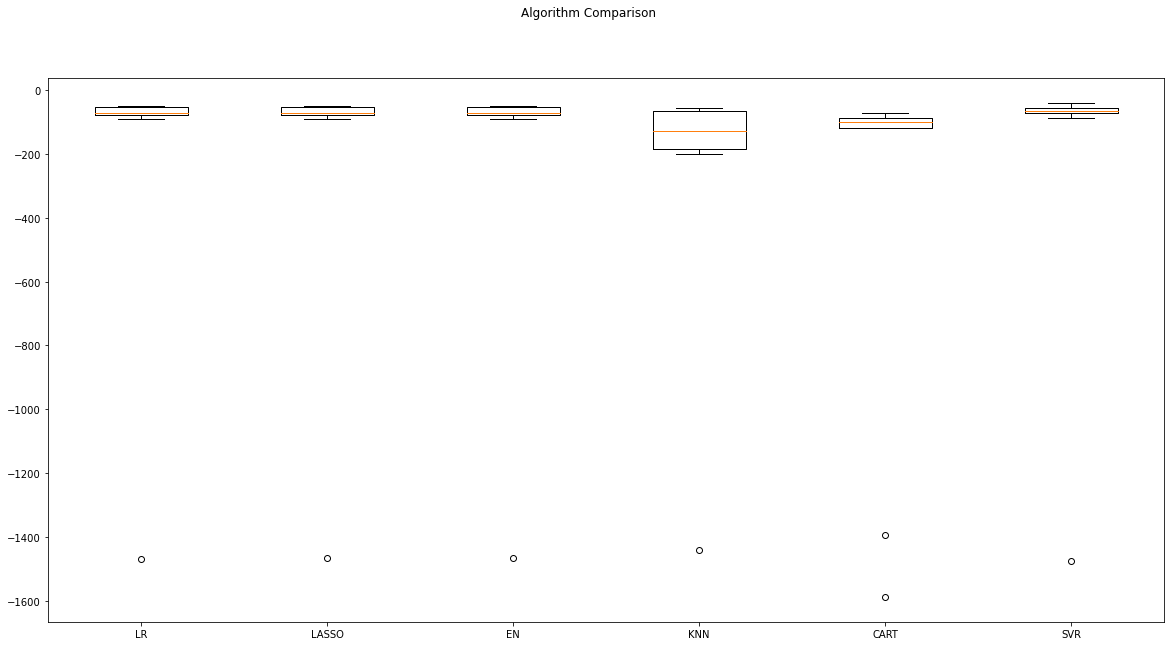

In [334]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [335]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -206.998943 (421.018829)
ScaledLASSO: -201.220321 (419.495383)
ScaledEN: -200.891586 (419.818136)
ScaledKNN: -243.592577 (391.167502)
ScaledCART: -371.878727 (558.404798)
ScaledSVR: -202.333394 (418.129029)


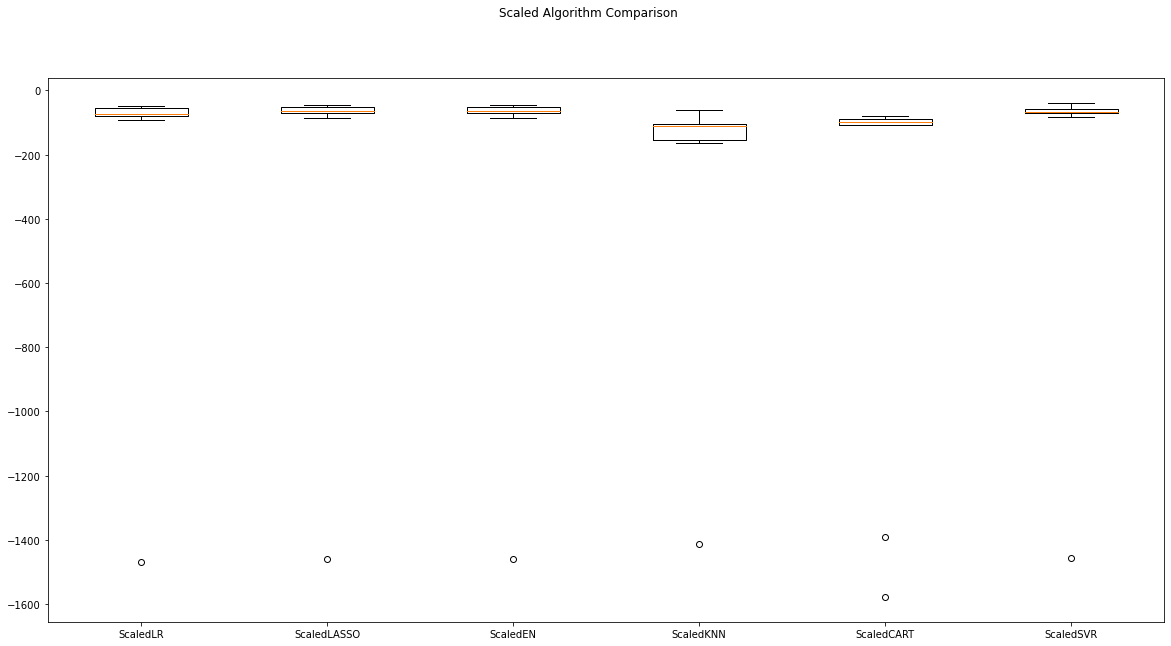

In [336]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [337]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [339]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -202.751835 using {'n_neighbors': 21}
-343.007615 (468.729330) with: {'n_neighbors': 1}
-241.779015 (387.900162) with: {'n_neighbors': 3}
-243.214952 (392.248562) with: {'n_neighbors': 5}
-226.724285 (405.963510) with: {'n_neighbors': 7}
-220.058424 (410.185854) with: {'n_neighbors': 9}
-215.470883 (408.864082) with: {'n_neighbors': 11}
-210.832797 (408.753270) with: {'n_neighbors': 13}
-208.334891 (410.715515) with: {'n_neighbors': 15}
-207.492558 (413.020855) with: {'n_neighbors': 17}
-203.744102 (410.492964) with: {'n_neighbors': 19}
-202.751835 (410.730803) with: {'n_neighbors': 21}


In [340]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -194.186780 (416.833070)
ScaledGBM: -256.792500 (433.909066)
ScaledRF: -217.389308 (405.729867)
ScaledET: -213.111791 (396.171416)


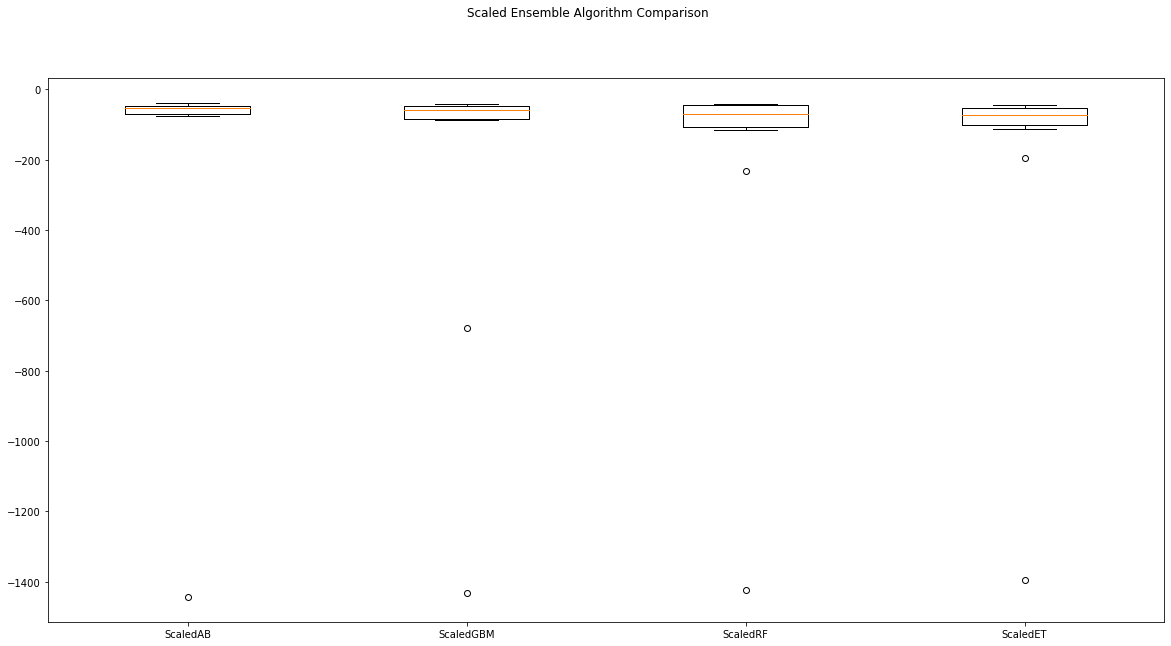

In [341]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [343]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -242.990310 using {'n_estimators': 100}
-244.220764 (432.799676) with: {'n_estimators': 50}
-242.990310 (422.449981) with: {'n_estimators': 100}
-245.337333 (421.432272) with: {'n_estimators': 150}
-245.070805 (417.163797) with: {'n_estimators': 200}
-245.703799 (415.557559) with: {'n_estimators': 250}
-246.547862 (414.473951) with: {'n_estimators': 300}
-246.623664 (412.572880) with: {'n_estimators': 350}
-247.045664 (412.271263) with: {'n_estimators': 400}


In [346]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(random_state=7)

In [347]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

67.55423422827923
